**Multiarmed bandit**

A multiarmed bandit is a problem where you have a set of actions, and you want to maximize your reward over time. The name comes from the idea of a slot machine (sometimes called a "one-armed bandit"), where you have to choose which arm of the slot machine to pull. Each arm has a reward distribution (unknown to you) that gives you a reward each time you pull that arm. In this problem, the question is: which arm do you choose, and how many times do you pull it?

Let us start with the imports. We use only numpy and matplotlib, and use the magic command `%matplotlib inline` to display the plots in the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The next thing we do is to seed the random number generator. This is done to ensure that the results are reproducible. At this point, this is not strictly necessary, but it is good practice to do so (and when working with Deep Reinforcement Learning, it is absolutely necessary).

In [2]:
rng = np.random.default_rng(1234)

Now, let us define the parameters of the problem. We have a set of bandits (2 in this case), each with a mean reward. We will use a Gaussian distribution for the reward, with a standard deviation of 1. We will also define the number of steps we will take, and the epsilon-greedy parameter.

In [3]:
nb = 2  # Number of bandits
m = [10, 30]  # Mean of each bandit
n_steps = 100
r = [0.1, 0]  #Epsilon-greedy values
rew = rng.multivariate_normal(m, np.eye(nb), size=n_steps)

Now, let us run the algorithm. We will use a simple epsilon-greedy algorithm, where we choose the best arm with probability $1-\epsilon$, and a random arm with probability $\epsilon$. We will also keep track of the cumulative reward over time. Note that, since this is an exercise, you will have to fill in the blanks in the code below.

In [4]:
win = np.zeros((len(r), n_steps))

for i, eps in enumerate(r):
    Q = np.zeros(nb)
    N = np.zeros(nb)
    for t in range(n_steps):
        # Code to be filled by the student: select the action a adequately
        # Update
        N[a] += 1
        Q[a] += (rew[t, a] - Q[a]) / N[a]
        win[i, t] = rew[t, a]

Finally, let us plot the results. We will plot the cumulative reward over time, for each of the algorithms. We will also plot the maximum gain, to see how far we are from the optimal solution. Note that the results show that the deterministic exploration is better than the no exploration case, but it is not the maximum gain (which is achieved by pulling the best arm every time, and that requires knowing the mean of each arm).

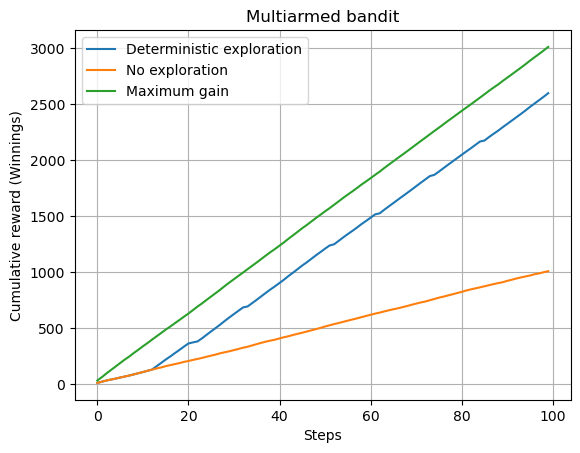

In [5]:
plt.plot(np.cumsum(win[0, :]), label="Deterministic exploration")
plt.plot(np.cumsum(win[1, :]), label="No exploration")
plt.plot(np.cumsum(np.max(rew, axis=1)), label="Maximum gain")
plt.xlabel("Steps")
plt.ylabel("Cumulative reward (Winnings)")
plt.title('Multiarmed bandit')
plt.grid()
plt.legend()
plt.show()